一、对 demo_highlevel_api.py 中的函数分开测试

In [ ]:
# -*- coding: utf-8 -*-

from pathlib import Path
import os
import sys
import uuid
import os
os.environ['PROJ_LIB'] = '/home/dls/anaconda3/envs/pytorch/share/proj '
# ERROR 1: PROJ: proj_create_from_database: Open of /home/dls/anaconda3/envs/pytorch/share/proj failed 不然会报错
import numpy as np
import pandas as pd

import fiona
from fiona.crs import from_epsg
import geopandas as gpd
import shapely
from shapely.geometry import Polygon, box, shape

from dggrid4py import DGGRIDv7, Dggs, dgselect, dggs_types

In [ ]:
executable = '/home/dls/data/openmmlab/DGGRID/build/src/apps/dggrid/dggrid'

dggrid_instance = DGGRIDv7(executable= executable, working_dir='./tmp/grids', capture_logs=False, silent=False)
path = './tmp/grids'
est_bound = shapely.geometry.box(20.2,57.00, 28.4,60.0 )

In [ ]:
gdf1 = dggrid_instance.grid_cell_polygons_for_extent('ISEA4T', 5, clip_geom=est_bound)


In [ ]:
print(gdf1 )

In [ ]:
df2 = dggrid_instance.grid_cellids_for_extent('ISEA7H', 5, clip_geom=est_bound)

In [ ]:
print(df2)


In [ ]:
cell_list_est = df2[0].values #获取seqnum编码
cell_list_est

In [ ]:
gdf4 = dggrid_instance.grid_cell_polygons_from_cellids(cell_list_est, 'ISEA7H', 5)

In [ ]:
gdf4

二、测试GDALcollection生成输出
path='/home/dls/data/openmmlab/DGGRID/examples/gdalCollection/outputfiles/everything_unwrap_points=FALSE.geojson'

In [2]:

from pathlib import Path
import os
import sys
os.environ['PROJ_LIB'] = '/home/dls/anaconda3/envs/pytorch/share/proj '
# ERROR 1: PROJ: proj_create_from_database: Open of /home/dls/anaconda3/envs/pytorch/share/proj failed 不然会报错
import numpy as np
import pandas as pd

import fiona
from fiona.crs import from_epsg
import geopandas as gpd
def example_read_geojson(path):
    """
    GDALcollection生成输出 包含了边临近编码 子格网编码 自身编码 中心点经纬度 cell边界经纬度

    Args:
        path (_type_):geojson路径
    """    
    return gpd.read_file(filename=path,drive="GeoJSON")

<AxesSubplot:>

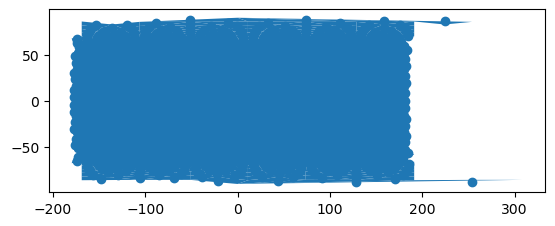

In [3]:
path='/home/dls/data/openmmlab/DGGRID/examples/gdalCollection/outputfiles/everything.geojson'
gdf = example_read_geojson(path)
gdf.plot()